In [32]:
!source ./bin/activate

In [80]:
import pandas as pd
from sklearn.impute import SimpleImputer  # helps fix missing values mathmatically
from sklearn.preprocessing import LabelEncoder  # for 2 values in single column
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer # convert a field with categorical to a martrix of 0,1 for each column
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [81]:
url = 'https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/data_preprocess1.csv'
df = pd.read_csv(url)

In [82]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    30 non-null     object 
 1   Age        29 non-null     float64
 2   Salary     28 non-null     float64
 3   Purchased  30 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


In [116]:
df.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [117]:
# features_df = df[['Country', 'Age', 'Salary']].copy()
# label_df = df[['Purchased']].copy()

# or using iloc
features = df.iloc[:, 0:3].values   # Input
label = df.iloc[:, -1]              # OUTPUT

In [118]:
# fixing age missing values 
dwief_input = SimpleImputer(missing_values=np.nan,strategy='mean')

In [119]:
dwief_input.fit(features[:,1:3])  # calculating missing values
features[:,1:3] = dwief_input.transform(features[:,1:3])  # making changes

In [120]:
# convert 2 values from label to 0 and 1 from strings
le = LabelEncoder()
label = le.fit_transform(label)
print (label)

[0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0]


In [121]:
# data preprossesing using categorical values
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')  # 0 represents column at index 0, onehotencorder is categorical

In [122]:
# Run transform of first column from state names in str to three 1,0 columns
final_features = ct.fit_transform(features)

In [123]:
training_input,testing_input,train_label,test_label=train_test_split(final_features, label, test_size=0.1)   # Note test size is a range of 0-1 in terms of proportion of total data

In [124]:
# calling decision tree classifier
classifier = DecisionTreeClassifier()

In [125]:
# Training classifier with above preprocess split data
trained_model = classifier.fit(training_input, train_label)

In [126]:
# We can now use trained model to make predictions
predicted_values = trained_model.predict(testing_input)

In [127]:
print (predicted_values)

[0 0 1]


In [128]:
# using accuracy score
accuracy_score(test_label, predicted_values)  # output is 0 to 1 (probability)

0.6666666666666666

In [129]:
# testing by input new random data
# dwief_new_data = np.array([['France','41','33000']])

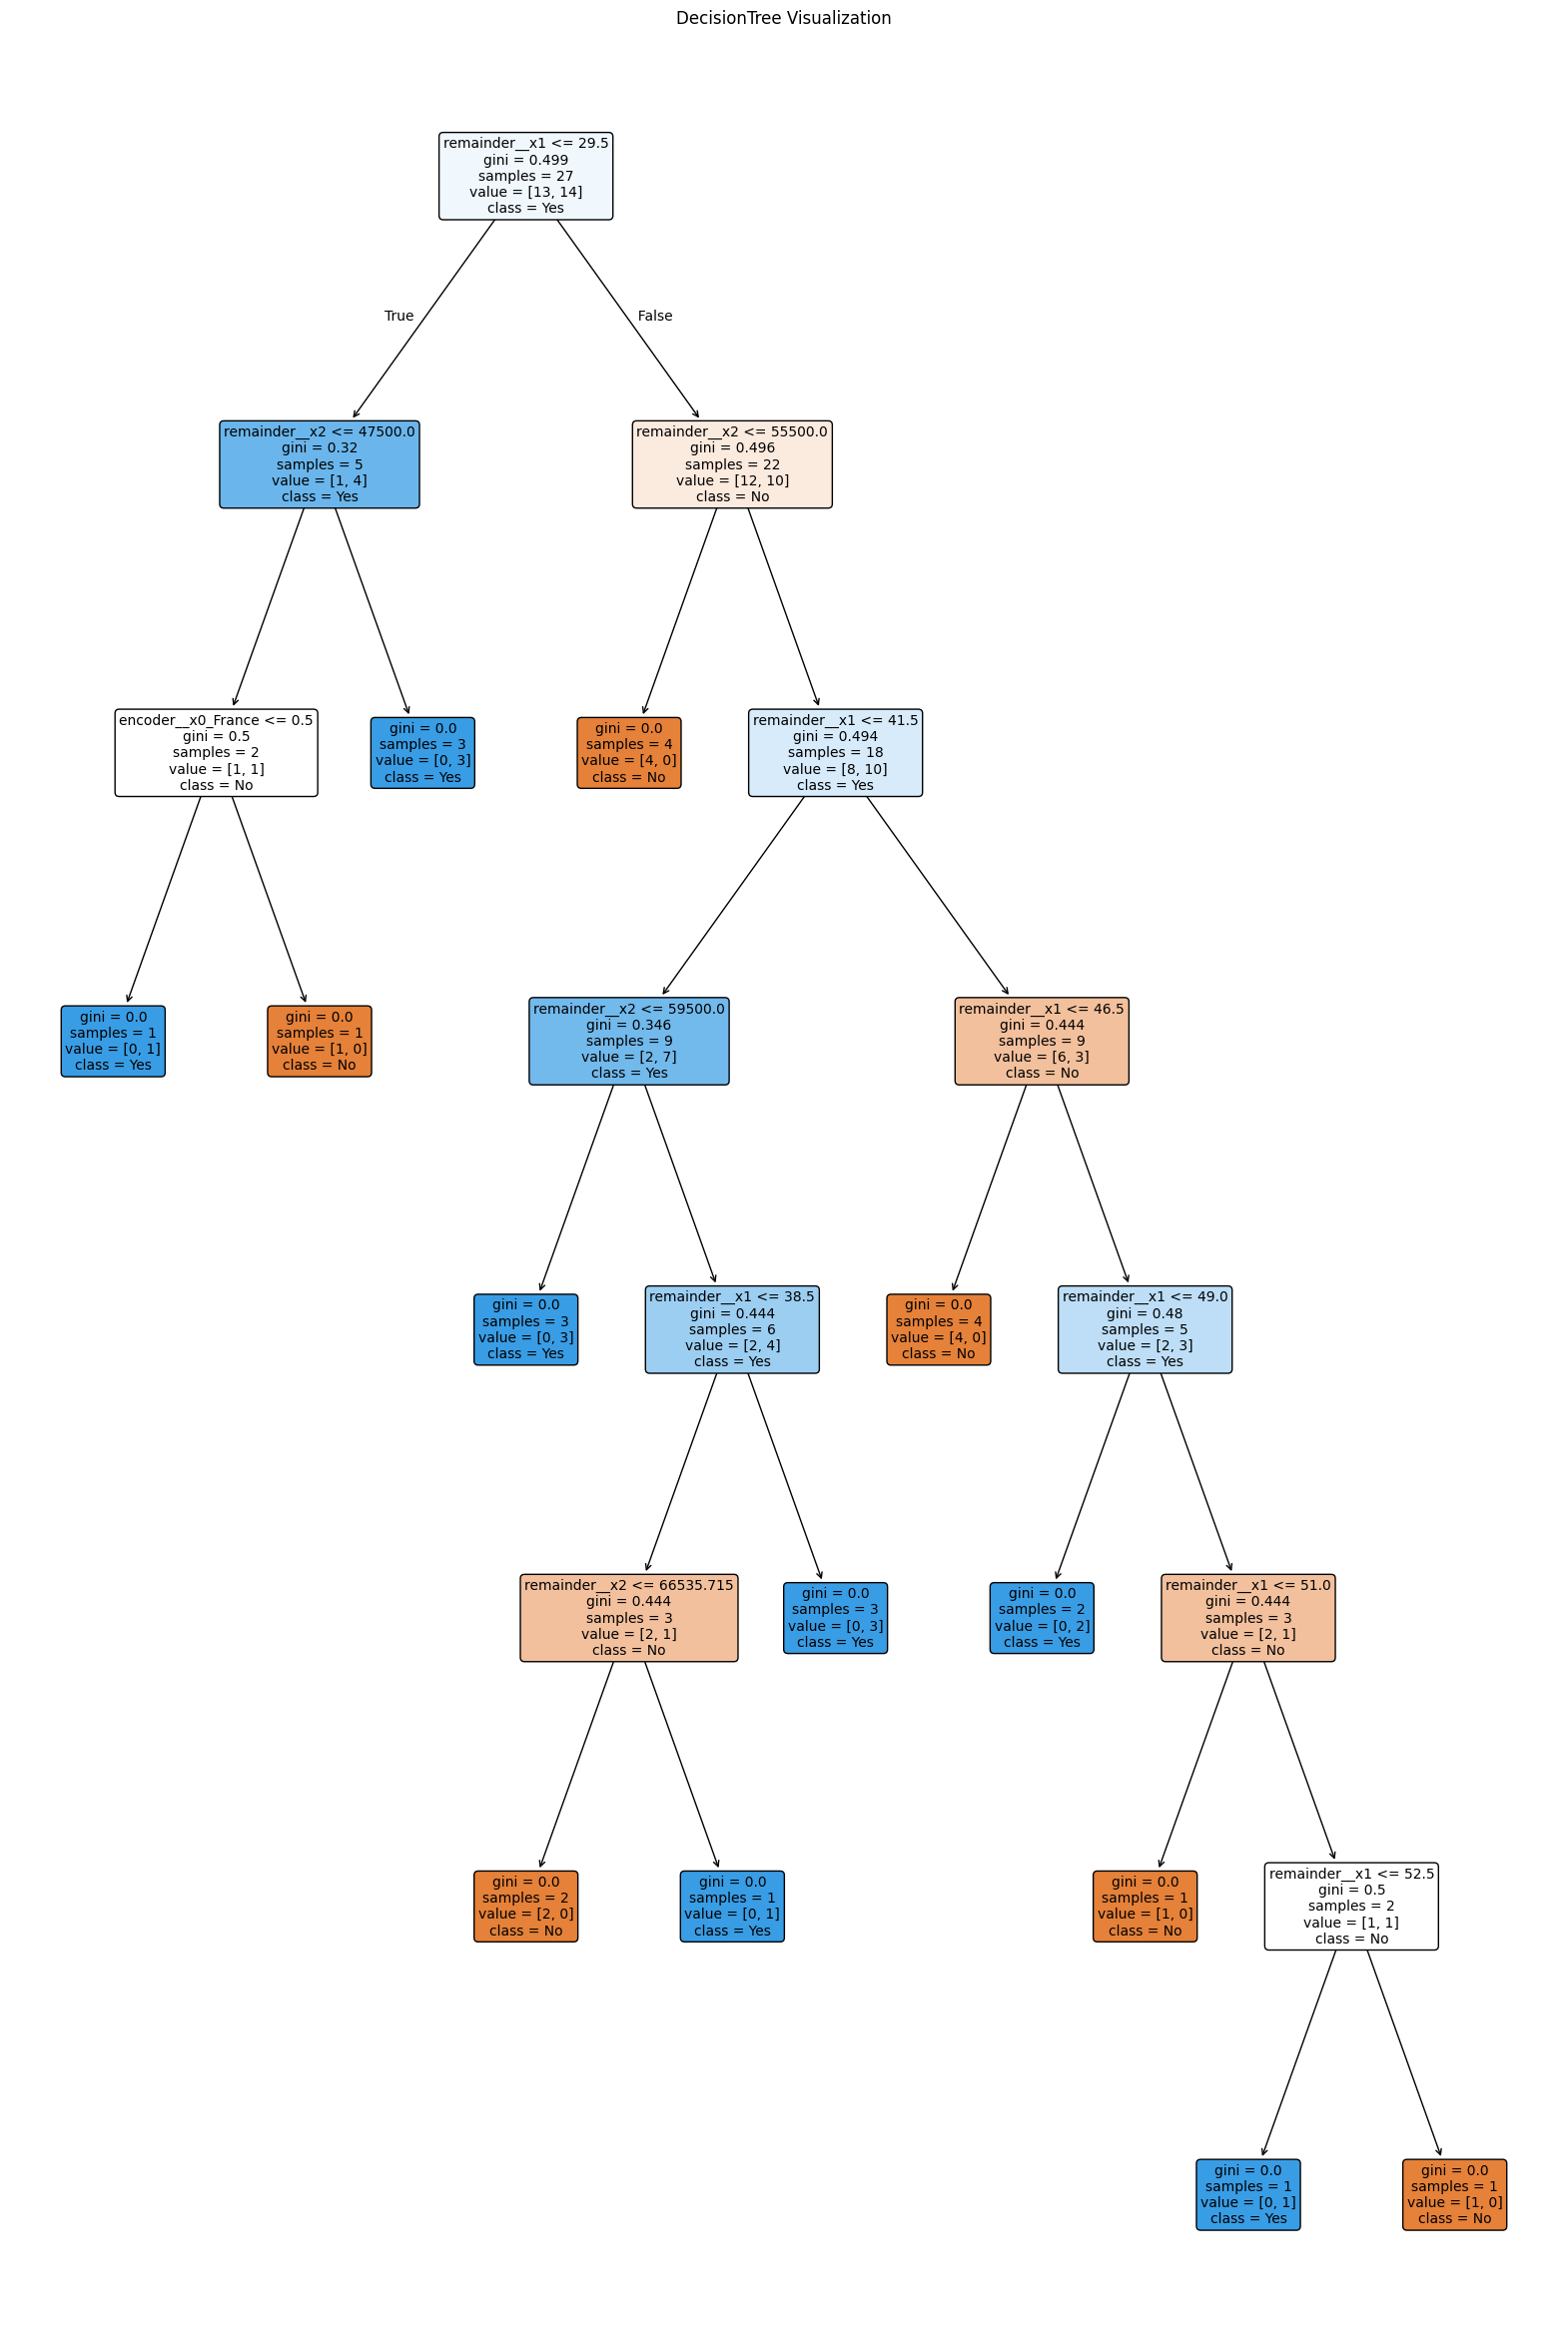

In [133]:
plt.figure(figsize=(20,30))
plot_tree(
    classifier,
    feature_names=ct.get_feature_names_out(), 
    class_names=le.classes_, 
    filled=True,
    fontsize=10,
    rounded=True
)
plt.title("DecisionTree Visualization")
plt.show()

In [101]:
ct.get_feature_names_out()

array(['encoder__x0_France', 'remainder__x1', 'remainder__x2'],
      dtype=object)

In [67]:
###MATPLOTLIB DEMOimport matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

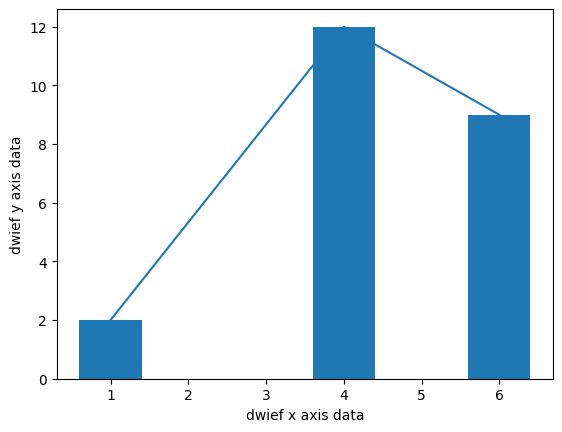

In [66]:
x1 = [1,4,6]
y1 = [2,12,9]
plt.xlabel('dwief x axis data')
plt.ylabel('dwief y axis data')
plt.plot(x1,y1) # for line plot
plt.bar(x1,y1)
plt.show